# Face Detection of the actors 

In [1]:
#impoeting libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, 

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
import os
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# read the csv file to check out the images and class
data = pd.read_csv("/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/Dataset/train.csv")
data.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
data['Class'].replace(['YOUNG','MIDDLE','OLD'],[0,1,2],inplace=True)
data.head(3)

,ID,Class
0,377.jpg,1
1,17814.jpg,0
2,21283.jpg,1


In [6]:
def readImage(path,ch = 3, resize=(150,150)):
	di = tf.io.read_file(path)
	di = tf.image.decode_jpeg(di, channels=ch)
	di = tf.image.convert_image_dtype(di, dtype=tf.float32)
	di = tf.image.resize(di, resize)
	return di

In [7]:
# function to load the data that includes images and respective labels
def load_data(image_path, label):
    img = readImage(image_path, 3, (150,150))
    return (img, label)

In [8]:
# built the list of image paths and list of respective responses of the images
PATH = "/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/Dataset/Train/final/Train"
image_paths = []
for path in os.listdir(PATH):
    image_paths.append(PATH+"/"+path)
print(len(image_paths))

response_list = []

for i in image_paths:
    _,tail = os.path.split(i)
    response = data.loc[data['ID'] == tail]['Class'].values[0]
    response_list.append(response)
print(len(response_list))

19906
19906


In [38]:
response_list

[]

In [10]:
# split the dataset into train and test dataset
train_size = int(0.9*(len(image_paths)))
print(train_size)
test_size = int(0.1*(len(image_paths)))

train_set = tf.data.Dataset.from_tensor_slices((image_paths[:train_size], response_list[:train_size]))
test_set = tf.data.Dataset.from_tensor_slices((image_paths[test_size:], response_list[test_size:]))

17915


In [11]:
print("train dataset size - ", train_size)
print("test dataset size - ", test_size)


train dataset size -  17915
test dataset size -  1990


In [12]:

train_set = (train_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

In [13]:
test_set = (test_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

In [14]:
# build the layers of CNN model
from tensorflow.keras import layers,models

cnn_model = models.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3), padding = 'same'),
    layers.MaxPooling2D((2, 2)),
    
    # layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),

    # layers.BatchNormalization(),
    
    # layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    # layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # layers.Dropout(0.25),
    layers.Dense(3, activation='softmax')
])

In [15]:
# view the summary of the cnn model
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        17344     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [16]:
# compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# fit the model
cnn_model.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10
280/280 [==============================] - 2737s 10s/step - loss: 0.8785 - accuracy: 0.6131 - val_loss: 0.7454 - val_accuracy: 0.6734
Epoch 2/10
280/280 [==============================] - 51s 182ms/step - loss: 0.7298 - accuracy: 0.6810 - val_loss: 0.6781 - val_accuracy: 0.7061
Epoch 3/10
280/280 [==============================] - 49s 174ms/step - loss: 0.6734 - accuracy: 0.7116 - val_loss: 0.6188 - val_accuracy: 0.7368
Epoch 4/10
280/280 [==============================] - 49s 177ms/step - loss: 0.6069 - accuracy: 0.7443 - val_loss: 0.5630 - val_accuracy: 0.7614
Epoch 5/10
280/280 [==============================] - 67s 240ms/step - loss: 0.5390 - accuracy: 0.7765 - val_loss: 0.5010 - val_accuracy: 0.7913
Epoch 6/10
280/280 [==============================] - 49s 177ms/step - loss: 0.4662 - accuracy: 0.8115 - val_loss: 0.4909 - val_accuracy: 0.7956
Epoch 7/10
280/280 [==============================] - 49s 176ms/step - loss: 0.4174 - accuracy: 0.8330 - val_loss: 0.4489 - val_ac

In [18]:
#train accuracy 
cnn_model.evaluate(train_set)

280/280 [==============================] - 26s 91ms/step - loss: 0.2914 - accuracy: 0.8839


[0.29138681292533875, 0.8838961720466614]

In [52]:
test_set

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
# test accuracy
cnn_model.evaluate(test_set)

280/280 [==============================] - 25s 88ms/step - loss: 0.3751 - accuracy: 0.8637


[0.37507709860801697, 0.8636972308158875]

In [20]:
test_pred = cnn_model.predict(test_set)

280/280 [==============================] - 27s 95ms/step


In [21]:
y_labels = [np.argmax(item) for item in test_pred]
print("Test Predictions response sample:",y_labels[:10])

test_response = response_list[test_size:]
print("Test True response sample:", test_response[:10])


Test Predictions response sample: [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
Test True response sample: [1, 1, 0, 0, 1, 0, 1, 1, 1, 0]


In [22]:
class_names = ['YOUNG','MIDDLE','OLD']

In [23]:
# funtion to plot confusio matrix to check the accuracy of each class value
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

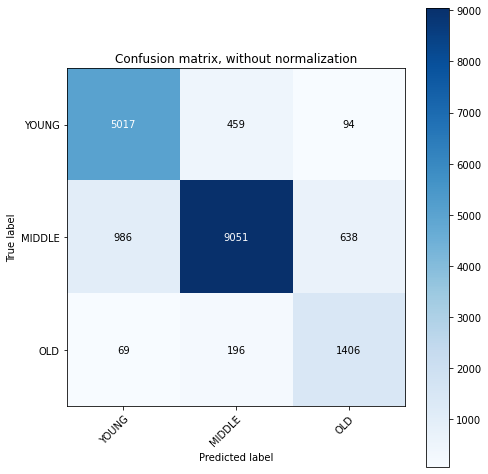

In [24]:
# plotting confusion matrix without normalization
plot_confusion_matrix(y_labels, test_response, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

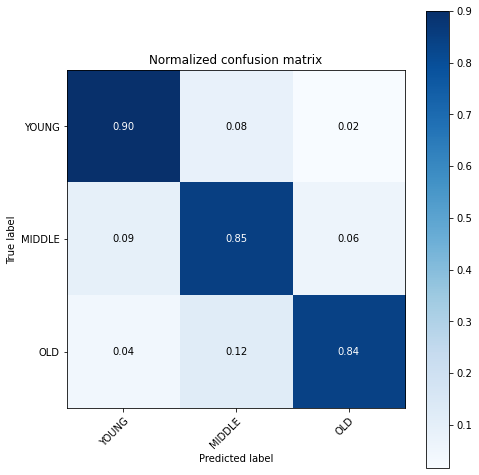

In [25]:
# plotting confusion matrix with normalization
plot_confusion_matrix(y_labels, test_response, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# Prediction for test dataset using final model

In [62]:
#Lets load the test data set
test = pd.read_csv('/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/test.csv')
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [ ]:
#data['Class'].replace(['YOUNG','MIDDLE','OLD'],[0,1,2],inplace=True)
#data.head(3)

In [63]:
def readImage(path,ch = 3, resize=(150,150)):
	di = tf.io.read_file(path)
	di = tf.image.decode_jpeg(di, channels=ch)
	di = tf.image.convert_image_dtype(di, dtype=tf.float32)
	di = tf.image.resize(di, resize)
	return di

In [64]:
# built the list of image paths and list of respective responses of the images
PATH = "/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test"
image_paths = []
for path in os.listdir(PATH):
    image_paths.append(PATH+"/"+path)
print(len(image_paths))

#response_list = []

#for i in image_paths:
 #   _,tail = os.path.split(i)
    #response = test.loc[test['ID'] == tail]['Class'].values[0]
   # response_list.append(response)
#print(len(response_list))

6636


In [96]:
image_paths

['/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test/15057.jpg',
 '/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test/15098.jpg',
 '/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test/15095.jpg',
 '/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test/15093.jpg',
 '/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test/15073.jpg',
 '/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test/15071.jpg',
 '/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test/15066.jpg',
 '/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test/15075.jpg',
 '/content/drive/MyDrive/DSP/Analytical  Vidhya/1 - Face detection/test_dataset2/test_Bh8pGW3/Test/15064.jpg',
 

In [65]:
test_data = tf.data.Dataset.from_tensor_slices(image_paths[:])

In [66]:
test_data

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [67]:
# function to load the data that includes images and respective labels
def load_data(image_path):
    img = readImage(image_path, 3, (150,150))
    return img

In [68]:
test_data = (test_data
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

In [69]:
test_data

<PrefetchDataset element_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None)>

In [70]:
pred = cnn_model.predict(test_data)

104/104 [==============================] - 111s 984ms/step


In [72]:
pred[0]

array([9.77e-01, 2.33e-02, 2.44e-05], dtype=float32)

In [77]:
predictions = []
for i in pred:
  predictions.append(np.argmax(i))

In [81]:
predictions[0:10]

[0, 1, 1, 1, 1, 2, 1, 1, 1, 1]

In [83]:
pred = pd.DataFrame(predictions, columns = ['Class'])
pred

,Class
0,0
1,1
2,1
3,1
4,1
...,...
6631,0
6632,0
6633,0
6634,0


In [84]:
x_test = pd.concat([test,pred], axis=1)
x_test

,ID,Class
0,25321.jpg,0
1,989.jpg,1
2,19277.jpg,1
3,13093.jpg,1
4,5367.jpg,1
...,...,...
6631,1876.jpg,0
6632,14940.jpg,0
6633,3638.jpg,0
6634,376.jpg,0


In [85]:
x_test.Class.value_counts()

1    4099
0    2013
2     524
Name: Class, dtype: int64

In [86]:
x_test.dtypes

ID       object
Class     int64
dtype: object

In [87]:
x_test['Class'] = x_test['Class'].replace({0: 'YOUNG' ,
                                             1: 'MIDDLE',
                                             2:'OLD'})
     

In [92]:
x_test.head(10)

,ID,Class
0,25321.jpg,YOUNG
1,989.jpg,MIDDLE
2,19277.jpg,MIDDLE
3,13093.jpg,MIDDLE
4,5367.jpg,MIDDLE
5,19851.jpg,OLD
6,10384.jpg,MIDDLE
7,24567.jpg,MIDDLE
8,2029.jpg,MIDDLE
9,4956.jpg,MIDDLE


In [94]:
#saving the data into csv file
x_test.to_csv(r"solution_submission.csv")

# **Thank you !!!**